# ĐỒ ÁN CUỐI KỲ LẬP TRÌNH CHO KHOA HỌC DỮ LIỆU
## THÀNH VIÊN
|MÃ SỐ|HỌ TÊN|
|:----:|:---:|
|19127472|NGUYỄN BÁ MINH|
|19127481|TRẦN HOÀNG NAM|

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## GIỚI THIỆU ĐỒ ÁN
**Đề tài đồ án**: Tìm hiểu và phân tích những yếu tố trong 10 phút đầu của 1 trận đấu liên minh huyền thoại có ảnh hưởng như thế nào đến kết quả trận đấu
- Dữ liệu các trận đấu được lấy ở [link này](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)
- Dữ liệu gồm 1 file duy nhất là data.csv
- Dữ liệu chứa thông tin của khoảng 10.000 trận đấu ở rank kim cương - cao thủ trong khoảng 10 phút đầu game
- Dữ liệu 1 dòng là thông tin của đội xanh và đội đỏ, mỗi đội sẽ có 19 cột chứa thông tin, tổng có 38 cột và 1 cột bluewin là cột kết quả trận đấu, 1 cột id là id của trận đấu, id này có thể dùng để lấy thêm thông tin từ API của riot game, vậy có tất cả 40 cột

### Đọc dữ liệu từ file data.csv và khám phá dữ liệu

In [2]:
data_df = pd.read_csv('data.csv')
data_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
data_df.shape

(9879, 40)

#### Dữ liệu có bao nhiêu dòng, cột, có cột nào có dữ liệu thiếu không, có vấn đề gì với các cột không
- Ta thấy rằng có chính xác 40 cột và 9.879 dòng, tức là khoảng 10.000 dòng như mô tả.
- Xem xét sơ các cột, ta thấy rằng không có dữ liệu thiếu, không có vấn đề gì cả.

#### Dữ liệu có bị lặp hay không

In [5]:
np.any(data_df.duplicated())

False

### TÌM HIỂU VÀ PHÂN TÍCH

#### NGUYỄN BÁ MINH

Cần tập trung yếu tố trong 10 phút đầu game để giành được chiến thắng

Đầu tiên dễ nhìn thấy nhất là ta sẽ xem thử là lựa chọn màu đội có ảnh hưởng đến tỉ lệ thắng hay không(Trong game thì việc ở đội xanh hay đội đỏ sẽ ảnh hưởng đến việc được cấm chọn trước hay sau)

In [45]:
blue = data_df['blueWins']
# blue = 1 là thể hiện đội xanh thắng, blue = 0 là đội đỏ thắng
games_count = data_df.shape[0]

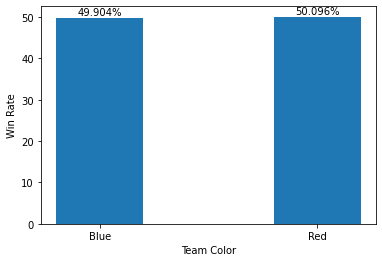

In [46]:
blue_win_rate = (len(data_df[blue == 1])/games_count) * 100
y = [round(blue_win_rate,3),100-round(blue_win_rate,3)]
x = ['Blue', 'Red']


bars = plt.bar(x, height=y, width=.4)

plt.xlabel('Team Color')
plt.ylabel('Win Rate')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.1, yval + 0.5, f"{yval}%")

plt.show()

Vậy có thể thấy là việc ở team màu nào không ảnh hưởng nhiều đến chiến thắng chung cuộc. 

Tiếp đến ta sẽ đi vào những chỉ số cơ bản nhất của trò chơi đó là số mạng hạ gục, lượng vàng, lượng kinh nghiệm. Ta sẽ tìm hiểu xem sự chênh lệch những yếu tố này trong 10 phút đầu của trận đấu có ảnh hưởng nhiều đến tỉ lệ chiến thắng hay không

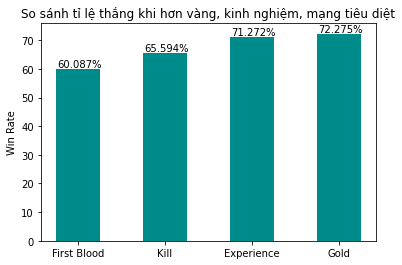

In [8]:
blue_win_kill = (data_df[blue==1]['blueKills'] - data_df[blue==1]['redKills']) >0
red_win_kill = (data_df[blue==0]['redKills'] - data_df[blue==0]['blueKills']) >0
kill = (blue_win_kill .value_counts()[True] +red_win_kill.value_counts()[True])/games_count
blue_win_exp_diff = (data_df[blue==1]['blueExperienceDiff']) >0
red_win_exp_diff = (data_df[blue==0]['redExperienceDiff']) >0
ExpDiff = (blue_win_exp_diff.value_counts()[True] + red_win_exp_diff.value_counts()[True])/games_count
blue_win_gold_diff = (data_df[blue==1]['blueGoldDiff']) >0
red_win_gold_diff = (data_df[blue==0]['redGoldDiff']) >0
GoldDiff = (blue_win_gold_diff.value_counts()[True] + red_win_gold_diff.value_counts()[True])/games_count
blue_win_first_blood = data_df[blue==1]['blueFirstBlood'].value_counts()[1]
red_win_first_blood = data_df[blue==0]['redFirstBlood'].value_counts()[1]
first_blood = (blue_win_first_blood + red_win_first_blood)/games_count *100

x = ['First Blood', 'Kill', 'Experience', 'Gold']
y = [round(first_blood,3), round(kill*100,3),round(ExpDiff*100,3), round(GoldDiff*100,3)]
bars = plt.bar(x, height=y, width=.5, color='darkcyan')


plt.ylabel('Win Rate')
plt.title('So sánh tỉ lệ thắng khi hơn vàng, kinh nghiệm, mạng tiêu diệt')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01, yval+0.5, f"{yval}%")

plt.show()

Nhận xét: Có thể thấy cả 4 yếu tố đều ảnh hưởng đến tỉ lệ thắng nhưng tỉ lệ Experience và Gold khá vượt trội so với Kill và First Blood. Vậy có thể thấy là trong 10 phút đầu tiên thì việc có được First Blood(mạng hạ gục đầu tiên trong trận đấu) hay chênh lệch Kill có ảnh hưởng đến tỉ lệ thắng nhưng tầm quan trọng của chúng không bằng so với Experience và Gold vì vậy Experience và Gold là 2 yếu tố nên được ưu tiên hơn trong 10 phút đầu của trận đấu.

Tiếp đến sẽ là những yếu tố ít được tập trung vào hơn khi nhắc đến 1 trò chơi.

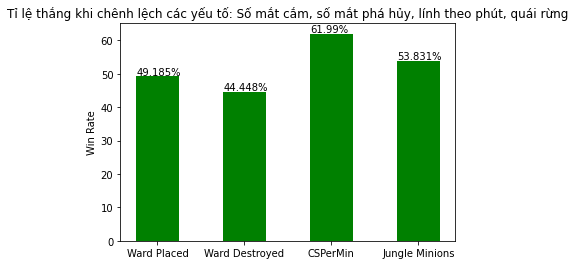

In [9]:
blue_win_ward_placed = (data_df[blue==1]['blueWardsPlaced'] - data_df[blue==1]['redWardsPlaced']) > 0
red_win_ward_placed = (data_df[blue==0]['redWardsPlaced'] - data_df[blue==0]['blueWardsPlaced']) > 0
ward_placed = (red_win_ward_placed.value_counts()[True] + blue_win_ward_placed.value_counts()[True])/games_count

blue_win_ward_destroyed = (data_df[blue==1]['blueWardsDestroyed'] - data_df[blue==1]['redWardsDestroyed']) > 0
red_win_ward_destroyed = (data_df[blue==0]['redWardsDestroyed'] - data_df[blue==0]['blueWardsDestroyed']) > 0
ward_destroyed = (red_win_ward_destroyed.value_counts()[True] + blue_win_ward_destroyed.value_counts()[True])/games_count

blue_win_CSPerMin = (data_df[blue==1]['blueCSPerMin'] - data_df[blue==1]['redCSPerMin']) > 0
red_win_CSPerMin = (data_df[blue==0]['redCSPerMin'] - data_df[blue==0]['blueCSPerMin']) > 0
CSPerMin = (red_win_CSPerMin.value_counts()[True] + blue_win_CSPerMin.value_counts()[True])/games_count

blue_win_TotalJungleMinionsKilled = (data_df[blue==1]['blueTotalJungleMinionsKilled'] - data_df[blue==1]['redTotalJungleMinionsKilled']) > 0
red_win_TotalJungleMinionsKilled = (data_df[blue==0]['redTotalJungleMinionsKilled'] - data_df[blue==0]['blueTotalJungleMinionsKilled']) > 0
TotalJungleMinionsKilled = (red_win_TotalJungleMinionsKilled.value_counts()[True] + blue_win_TotalJungleMinionsKilled.value_counts()[True])/games_count

x = ['Ward Placed', 'Ward Destroyed', 'CSPerMin', 'Jungle Minions']
y = [round(ward_placed*100,3), round(ward_destroyed*100,3),round(CSPerMin*100,3), round(TotalJungleMinionsKilled*100,3)]
bars = plt.bar(x, height=y, width=.5, color='green')


plt.ylabel('Win Rate')
plt.title('Tỉ lệ thắng khi chênh lệch các yếu tố: Số mắt cắm, số mắt phá hủy, lính theo phút, quái rừng')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01, yval+0.5, f"{yval}%")



Có thể thấy là chỉ số CSPerMin và JungleMinions rất quan trọng và có ảnh hưởng nhiều đến trận đấu, chỉ số WardPlaced và WardDestroyed có ảnh hưởng nhưng có lẽ là trong 10 phút đầu của trận đấu nên ưu tiên các chỉ số kia hơn

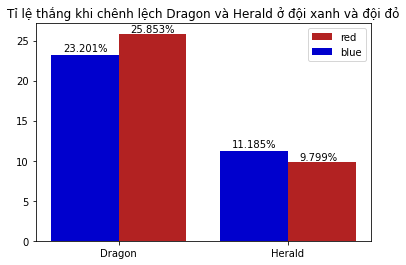

In [15]:
blue_win_dragon = (data_df[blue==1]['blueDragons'] - data_df[blue==1]['redDragons']) > 0
red_win_dragon = (data_df[blue==0]['redDragons'] - data_df[blue==0]['blueDragons']) > 0
red_dragon = red_win_dragon.value_counts()[True]/games_count
blue_dragon = blue_win_dragon.value_counts()[True]/games_count

blue_win_herald = (data_df[blue==1]['blueHeralds'] - data_df[blue==1]['redHeralds']) > 0
red_win_herald = (data_df[blue==0]['redHeralds'] - data_df[blue==0]['blueHeralds']) > 0
red_herald = red_win_herald.value_counts()[True]/games_count
blue_herald = blue_win_herald.value_counts()[True]/games_count

red_stat = [round(red_dragon*100,3), round(red_herald*100,3)]
blue_stat = [round(blue_dragon*100,3), round(blue_herald*100,3)]
x = ['Dragon', 'Herald']
xpos = np.arange(2)
plt.xticks(xpos, x)
bars1 = plt.bar(xpos+.2, red_stat, color='firebrick', width=.4, label="red")
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.07, yval+0.25, f"{yval}%")
bars2 = plt.bar(xpos-.2, blue_stat, color='mediumblue', width=.4, label="blue")
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.07, yval+0.5, f"{yval}%")
plt.legend()
plt.title("Tỉ lệ thắng khi chênh lệch Dragon và Herald ở đội xanh và đội đỏ")
plt.show()

Có 2 chỉ số khá thú vị và chênh lệch khá rõ là chỉ số Dragon và Herald và từ đó có thể thấy là khi ở đội đỏ nên ưu tiên tiêu diệt Dragon còn ở đội xanh thì tiêu diệt Herald (Có lẽ là do vị trí của Dragon và Herald trên bản đồ tác động đến việc lựa chọn tiêu diệt mục tiêu nào)

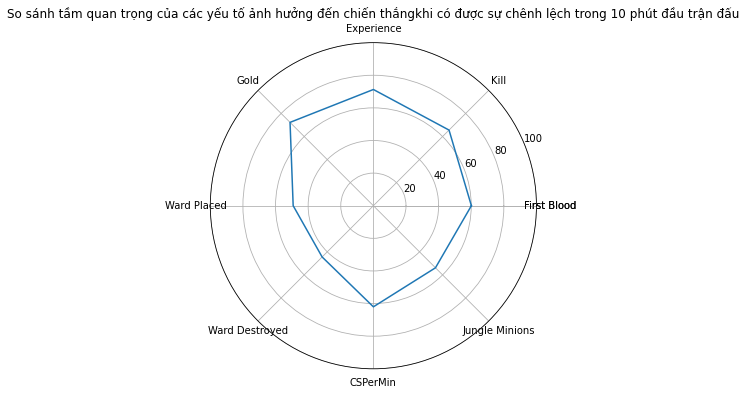

In [43]:
categories = ['First Blood', 'Kill', 'Experience', 'Gold', 'Ward Placed', 'Ward Destroyed', 'CSPerMin', 'Jungle Minions', 'First Blood']
vehicle = [round(first_blood,3), round(kill*100,3),round(ExpDiff*100,3), round(GoldDiff*100,3), round(ward_placed*100,3), round(ward_destroyed*100,3),round(CSPerMin*100,3), round(TotalJungleMinionsKilled*100,3), round(first_blood,3)]
placement = np.linspace(start=0, stop=2*np.pi, num=len(vehicle))
plt.figure(figsize=(6,6))
plt.subplot(polar=True)
plt.plot(placement, vehicle)
lines, labels = plt.thetagrids(np.degrees(placement), labels=categories)
plt.ylim([0,100])
plt.title("So sánh tầm quan trọng của các yếu tố ảnh hưởng đến chiến thắngkhi có được sự chênh lệch trong 10 phút đầu trận đấu")
plt.show()

Kết luận: Vậy dựa vào các phân tích trên có thể trả lời câu hỏi đặt ra ban đầu là các yếu tố cần phải tập trung nhiều hơn trong 10 phút đầu để giành chiến thắng trong 1 trận đấu liên minh huyền thoại là Kill, Experience và Gold. 
Tất nhiên tất cả yếu tố trên đều quan trọng và không nên chỉ tập trung vào 3 yếu tố đó mà bỏ quên những yếu tố khác.

#### TRẦN HOÀNG NAM